<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(_0_4)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_-0.4'

In [4]:
os.listdir(base_path)

['data_add_delta_-0.4_n250.csv',
 'data_add_delta_-0.4_n120.csv',
 'data_add_delta_-0.4_n60.csv',
 'data_add_delta_-0.4_n30.csv',
 'data_add_delta_-0.4_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-0.4_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,54.266279,49.846687,89.788729,-0.686947,203.214747,203.583375,-0.368628
1,0.0,1.0,79.278513,73.611907,35.879667,0.887367,199.657455,198.926113,0.731342
2,0.0,2.0,89.458052,81.226335,43.234374,0.165602,224.084363,224.014699,0.069664
3,0.0,3.0,22.100758,96.049180,73.842106,-0.539543,201.452500,202.181489,-0.728989
4,0.0,4.0,90.533637,67.361013,34.370402,-0.685880,201.579172,202.355350,-0.776179
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,55.512881,67.767928,47.014323,-0.197875,180.097257,180.228266,-0.131009
29996,999.0,26.0,95.432322,26.200930,86.304349,0.100513,218.038114,217.937248,0.100866
29997,999.0,27.0,42.790320,46.915556,39.261788,-0.183226,138.784438,138.811203,-0.026765
29998,999.0,28.0,55.499214,36.665307,60.157215,-1.091648,161.230087,162.185488,-0.955401


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,54.266279,49.846687,89.788729,-0.686947,203.214747,203.583375,-0.368628
1,0.0,1.0,79.278513,73.611907,35.879667,0.887367,199.657455,198.926113,0.731342
2,0.0,2.0,89.458052,81.226335,43.234374,0.165602,224.084363,224.014699,0.069664
3,0.0,3.0,22.100758,96.049180,73.842106,-0.539543,201.452500,202.181489,-0.728989
4,0.0,4.0,90.533637,67.361013,34.370402,-0.685880,201.579172,202.355350,-0.776179
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,55.512881,67.767928,47.014323,-0.197875,180.097257,180.228266,-0.131009
29996,999.0,26.0,95.432322,26.200930,86.304349,0.100513,218.038114,217.937248,0.100866
29997,999.0,27.0,42.790320,46.915556,39.261788,-0.183226,138.784438,138.811203,-0.026765
29998,999.0,28.0,55.499214,36.665307,60.157215,-1.091648,161.230087,162.185488,-0.955401


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    54.266279  49.846687  89.788729  ...  203.214747  203.583375 -0.368628
      1.0    79.278513  73.611907  35.879667  ...  199.657455  198.926113  0.731342
      2.0    89.458052  81.226335  43.234374  ...  224.084363  224.014699  0.069664
      3.0    22.100758  96.049180  73.842106  ...  201.452500  202.181489 -0.728989
      4.0    90.533637  67.361013  34.370402  ...  201.579172  202.355350 -0.776179
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   55.512881  67.767928  47.014323  ...  180.097257  180.228266 -0.131009
      26.0   95.432322  26.200930  86.304349  ...  218.038114  217.937248  0.100866
      27.0   42.790320  46.915556  39.261788  ...  138.784438  138.811203 -0.026765
      28.0   55.499214  36.665307  60.157215  ...  161.230087  162.185488 -0.955401
      29.0   48.461510  33.375414  37.275827  ...  128.836470  128.957237 -0.120767

[30000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    54.266279  49.846687  89.788729  ...  203.214747  203.583375 -0.368628
      1.0    79.278513  73.611907  35.879667  ...  199.657455  198.926113  0.731342
      2.0    89.458052  81.226335  43.234374  ...  224.084363  224.014699  0.069664
      3.0    22.100758  96.049180  73.842106  ...  201.452500  202.181489 -0.728989
      4.0    90.533637  67.361013  34.370402  ...  201.579172  202.355350 -0.776179
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   55.512881  67.767928  47.014323  ...  180.097257  180.228266 -0.131009
      26.0   95.432322  26.200930  86.304349  ...  218.038114  217.937248  0.100866
      27.0   42.790320  46.915556  39.261788  ...  138.784438  138.811203 -0.026765
      28.0   55.499214  36.665307  60.157215  ...  161.230087  162.185488 -0.955401
      29.0   48.461510  33.375414  37.275827  ...  128.836470  128.957237 -0.120767

[30000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,54.266279,49.846687,89.788729,-0.686947,203.214747,203.583375,-0.368628
1,0.0,1.0,79.278513,73.611907,35.879667,0.887367,199.657455,198.926113,0.731342
2,0.0,2.0,89.458052,81.226335,43.234374,0.165602,224.084363,224.014699,0.069664
3,0.0,3.0,22.100758,96.049180,73.842106,-0.539543,201.452500,202.181489,-0.728989
4,0.0,4.0,90.533637,67.361013,34.370402,-0.685880,201.579172,202.355350,-0.776179
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,55.512881,67.767928,47.014323,-0.197875,180.097257,180.228266,-0.131009
29996,999.0,26.0,95.432322,26.200930,86.304349,0.100513,218.038114,217.937248,0.100866
29997,999.0,27.0,42.790320,46.915556,39.261788,-0.183226,138.784438,138.811203,-0.026765
29998,999.0,28.0,55.499214,36.665307,60.157215,-1.091648,161.230087,162.185488,-0.955401


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    54.266279  49.846687  89.788729  ...  203.214747  203.583375 -0.368628
      1.0    79.278513  73.611907  35.879667  ...  199.657455  198.926113  0.731342
      2.0    89.458052  81.226335  43.234374  ...  224.084363  224.014699  0.069664
      3.0    22.100758  96.049180  73.842106  ...  201.452500  202.181489 -0.728989
      4.0    90.533637  67.361013  34.370402  ...  201.579172  202.355350 -0.776179
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   55.512881  67.767928  47.014323  ...  180.097257  180.228266 -0.131009
      26.0   95.432322  26.200930  86.304349  ...  218.038114  217.937248  0.100866
      27.0   42.790320  46.915556  39.261788  ...  138.784438  138.811203 -0.026765
      28.0   55.499214  36.665307  60.157215  ...  161.230087  162.185488 -0.955401
      29.0   48.461510  33.375414  37.275827  ...  128.836470  128.957237 -0.120767

[30000 rows x 7 columns]

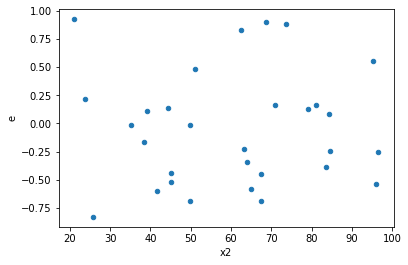

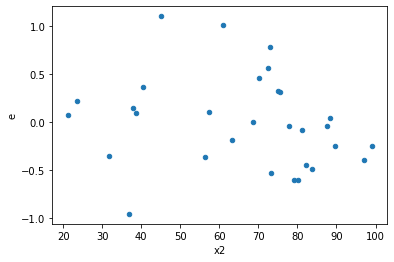

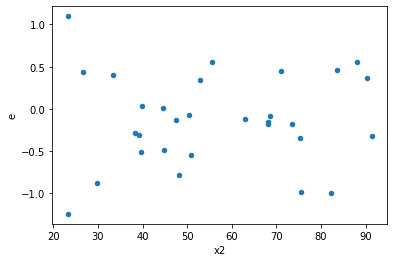

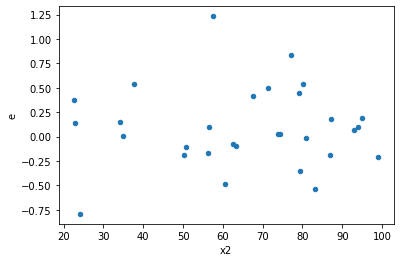

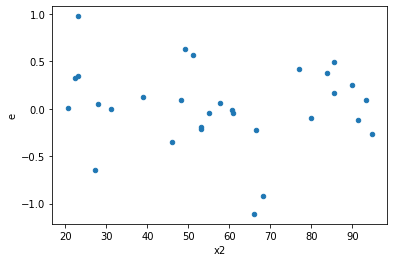

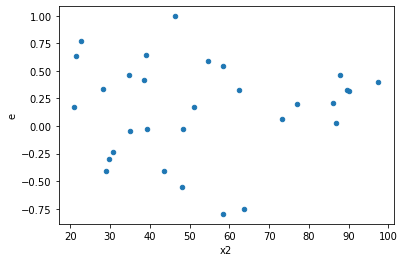

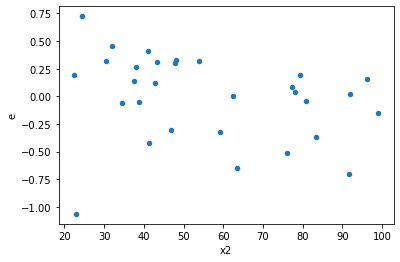

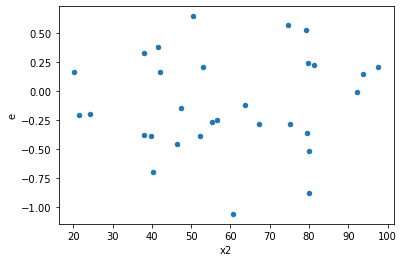

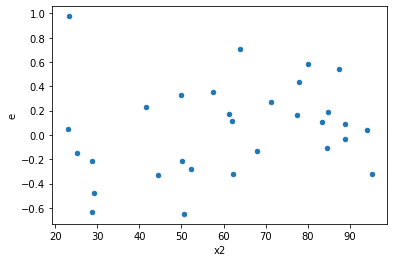

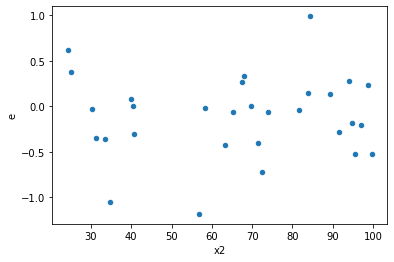

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,9.0,9.0,1.1005164310080346,1.757298711893473,0.12227960344533718,0.19525541243260813,1.5967946160366264,0.4966208845094897,0.7516895577452551,0.24831044225474486,Reject001=1 : Homoscedasticity
12.0,9.0,9.0,1.2121332685191577,1.5513473638296174,0.1346814742799064,0.17237192931440193,1.2798488451066703,0.7191821521399113,0.6404089239300443,0.35959107606995566,Reject001=1 : Homoscedasticity
14.0,9.0,9.0,1.3478209814941684,2.1478687877677825,0.14975788683268537,0.23865208752975361,1.5935861047263833,0.49845694386431627,0.7507715280678419,0.24922847193215814,Reject001=1 : Homoscedasticity
15.0,9.0,9.0,2.093151751171143,2.2300887643491127,0.23257241679679364,0.24778764048323476,1.0654214454835165,0.926341096895452,0.536829451552274,0.463170548447726,Reject001=1 : Homoscedasticity
18.0,9.0,9.0,0.6631066383149268,0.7905218167721205,0.0736785153683252,0.0878357574191245,1.192148850720268,0.7977437368728522,0.6011281315635739,0.3988718684364261,Reject001=1 : Homoscedasticity
19.0,9.0,9.0,1.1497238006435373,1.9889907290074835,0.12774708896039302,0.2209989698897204,1.7299726489911593,0.4266709886906124,0.7866645056546938,0.2133354943453062,Reject001=1 : Homoscedasticity
22.0,9.0,9.0,1.7476315554111395,1.9194128916236677,0.19418128393457104,0.21326809906929642,1.0982937940669741,0.8912146541273569,0.5543926729363216,0.44560732706367845,Reject001=1 : Homoscedasticity
25.0,9.0,9.0,1.6317394115249453,3.0248273522961817,0.18130437905832725,0.3360919280329091,1.8537441278502451,0.371479760343399,0.8142601198283005,0.1857398801716995,Reject001=1 : Homoscedasticity
26.0,9.0,9.0,0.5060190987859999,1.2538229838982489,0.05622434430955555,0.1393136648775832,2.4778175110511036,0.19265271712409082,0.9036736414379546,0.09632635856204541,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,9.0,1.1005164310080346,1.757298711893473,0.12227960344533718,0.19525541243260813,1.5967946160366264,0.4966208845094897,Reject001=1 : Homoscedasticity
1.0,9.0,9.0,2.800521788517428,0.8313427144563879,0.31116908761304757,0.09237141271737642,0.2968527928848907,0.08487541453520554,Reject001=1 : Homoscedasticity
2.0,9.0,9.0,3.8827686720812213,2.3457663518894916,0.4314187413423579,0.2606407057654991,0.6041478517009169,0.46446529309696055,Reject001=1 : Homoscedasticity
3.0,9.0,9.0,1.8534246793924372,1.259765801708894,0.20593607548804857,0.13997397796765487,0.6796962486340972,0.5743581565173883,Reject001=1 : Homoscedasticity
4.0,9.0,9.0,1.678522941024693,1.1117693092467285,0.18650254900274366,0.12352992324963649,0.6623497850842738,0.549170520109748,Reject001=1 : Homoscedasticity
5.0,9.0,9.0,1.436975797261565,1.0947151239975474,0.15966397747350725,0.12163501377750527,0.7618187627681262,0.6918680195893395,Reject001=1 : Homoscedasticity
6.0,9.0,9.0,1.8520498715846343,1.0674975625266359,0.20578331906495936,0.11861084028073732,0.5763870503191543,0.4242821454629505,Reject001=1 : Homoscedasticity
7.0,9.0,9.0,1.731825230083741,1.668890909391821,0.1924250255648601,0.18543232326575787,0.9636601202022695,0.9569309097631351,Reject001=1 : Homoscedasticity
8.0,9.0,9.0,1.9441564592763565,0.4338566600450914,0.2160173843640396,0.04820629556056571,0.2231593336919906,0.035763589337707125,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      972
Reject001=0 : Heteroscedasticity     28
Name: Result_test, dtype: int64